In [ ]:
!pip install stopwords

In [ ]:
!pip install swifter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 17.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16507 sha256=12b657f6f53b58f062da6aef4a55ead828b081e0650cf0fe0ff6e9739934d25e
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter


In [ ]:
!pip install nltk

In [ ]:
!pip install flair

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.3/388.3 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 68.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 73.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 32.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 58.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 14.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py

In [ ]:
!pip install scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import flair
from flair.data import Sentence
import re
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random as rn
import seaborn as sns
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
from PIL import Image
pd.options.display.max_rows = None

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df_train = pd.read_csv("/content/train.csv")
df_train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
df_val = pd.read_csv("/content/test.csv")
df_val.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [ ]:
print("Training data shape:",df_train.shape)
print("Validation data shape:",df_val.shape)

Training data shape: (31962, 3)
Validation data shape: (17197, 2)


In [ ]:
df_train.tweet = df_train.tweet.astype('str')
df_val.tweet = df_val.tweet.astype('str')

In [ ]:
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer
nltk.download('stopwords')
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df_train.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [ ]:
df_train = df_train.drop_duplicates(keep='first')

In [ ]:
df_train.shape

(31962, 3)

In [ ]:
def clean(raw):
    """ Remove hyperlinks and markup """
    result = re.sub("<[a][^>]*>(.+?)</[a]>", 'Link.', raw)
    result = re.sub('&gt;', "", result)
    result = re.sub('&#x27;', "'", result)
    result = re.sub('&quot;', '"', result)
    result = re.sub('&#x2F;', ' ', result)
    result = re.sub('<p>', ' ', result)
    result = re.sub('</i>', '', result)
    result = re.sub('&#62;', '', result)
    result = re.sub('<i>', ' ', result)
    result = re.sub("\n", '', result)
    return result

In [ ]:
def remove_username(text):
    cleaned_string = re.sub(r"user", ' ', text)
    return cleaned_string

In [ ]:
def remove_num(texts):
   output = re.sub(r'\d+', '', texts)
   return output

In [ ]:
def deEmojify(x):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'', x)

In [ ]:
def unify_whitespaces(x):
    cleaned_string = re.sub(' +', ' ', x)
    return cleaned_string

In [ ]:
def remove_symbols(x):
    cleaned_string = re.sub(r"[^a-zA-Z0-9?!.,]+", ' ', x)
    return cleaned_string

In [ ]:
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"',','))
    return final

In [ ]:
stop=set(stopwords.words("english"))
stemmer=PorterStemmer()
lemma=WordNetLemmatizer()

def remove_stopword(text):
   text=[word.lower() for word in text.split() if word.lower() not in stop]
   return " ".join(text)

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
def Stemming(text):
   stem=[]
   stopword = stopwords.words('english')
   snowball_stemmer = SnowballStemmer('english')
   word_tokens = nltk.word_tokenize(text)
   stemmed_word = [snowball_stemmer.stem(word) for word in word_tokens]
   stem=' '.join(stemmed_word)
   return stem

In [ ]:
def cleaning(df,review):
    df[review] = df[review].apply(clean)
    df[review] = df[review].apply(deEmojify)
    df[review] = df[review].str.lower()
    df[review] = df[review].apply(remove_num)
    df[review] = df[review].apply(remove_symbols)
    df[review] = df[review].apply(remove_punctuation)
    df[review] = df[review].apply(remove_stopword)
    df[review] = df[review].apply(unify_whitespaces)
    df[review] = df[review].apply(remove_username)
    df[review] = df[review].apply(Stemming)

In [ ]:
cleaning(df_train,'tweet')

In [ ]:
df_train[['tweet']].head(20)

,tweet
0,father dysfunct selfish drag kid dysfunct run
1,thank lyft credit use caus offer wheelchair va...
2,bihday majesti
3,model love u take u time ur
4,factsguid societi motiv
5,huge fan fare big talk leav chao pay disput ge...
6,camp tomorrow danni
7,next school year year exam think school exam h...
8,love land allin cav champion cleveland clevela...
9,welcom gr


In [ ]:
temp = df_train.groupby('label').count()['tweet'].reset_index().sort_values(by='tweet',ascending=False)
temp.style.background_gradient(cmap='Purples')

,label,tweet
0,0,29720
1,1,2242


<Axes: xlabel='label', ylabel='count'>

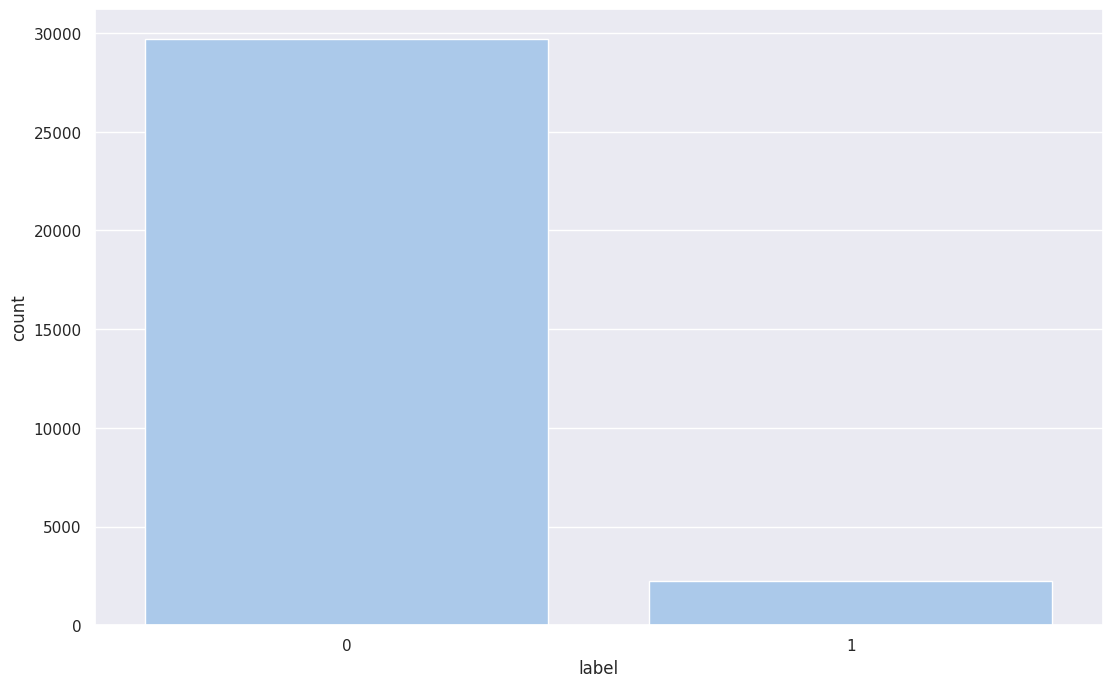

In [ ]:
sns.set_theme(style='whitegrid')
sns.set(rc = {'figure.figsize':(13,8)})
sns.set_palette("pastel")
sns.countplot(x='label',data=df_train)

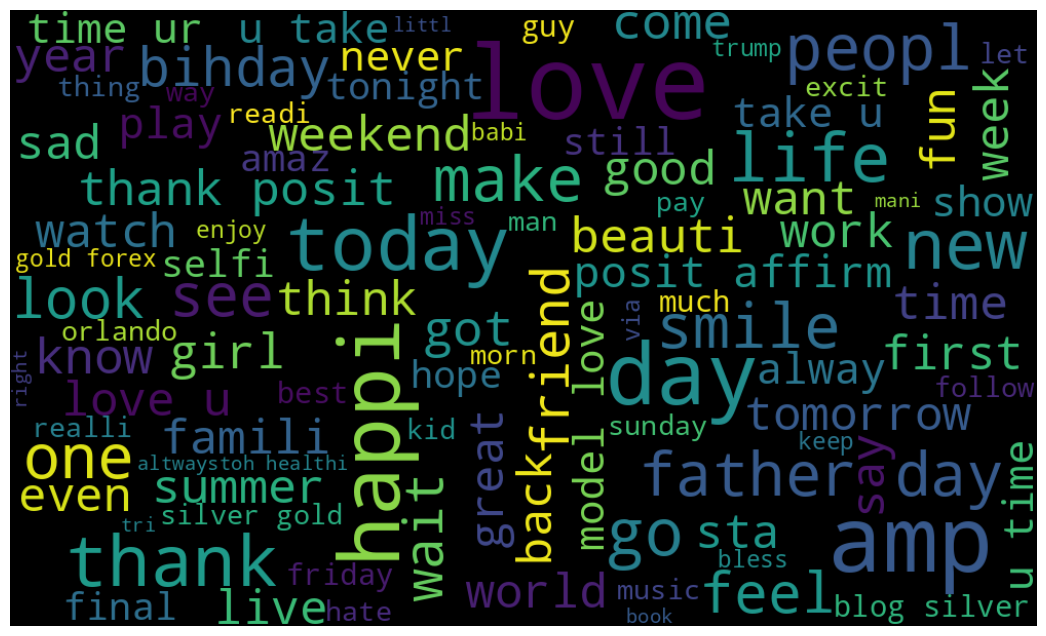

In [ ]:
txt = ' '.join(rev for rev in df_train.tweet)
plt.figure(figsize=(15,8))

wordcloud = WordCloud(
            background_color = 'black',
            max_font_size = 100,
            max_words = 100,
            width = 1000,
            height = 600
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
negative = df_train[df_train['label']==1]
positive = df_train[df_train['label']==0]

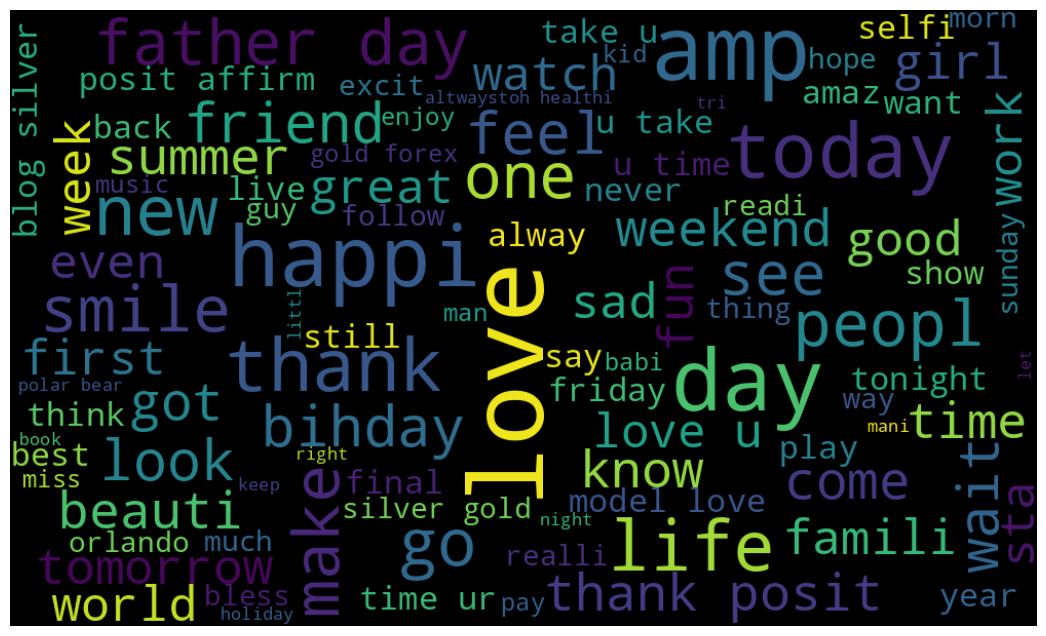

In [ ]:
txt = ' '.join(rev for rev in positive.tweet)
plt.figure(figsize=(15,8))

wordcloud = WordCloud(
            background_color = 'black',
            max_font_size = 100,
            max_words = 100,
            width = 1000,
            height = 600
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

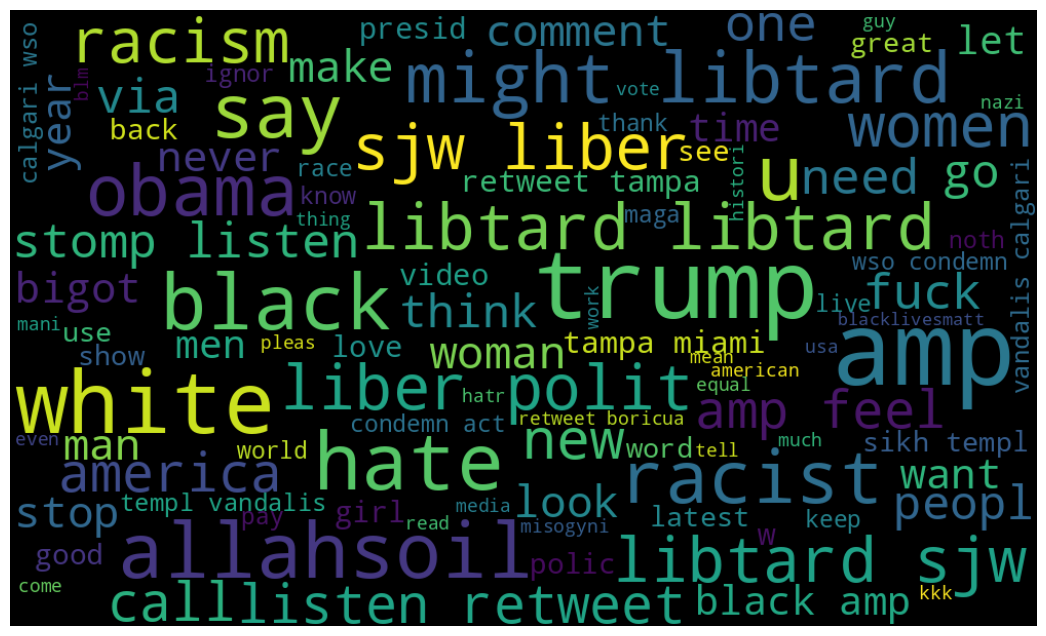

In [ ]:
txt = ' '.join(rev for rev in negative.tweet)
plt.figure(figsize=(15,8))

wordcloud = WordCloud(
            background_color = 'black',
            max_font_size = 100,
            max_words = 100,
            width = 1000,
            height = 600
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
df_vis = df_train.copy()

In [ ]:
df_vis['Num_word_tweet'] = df_vis['tweet'].apply(lambda x:len(str(x).split()))

<Axes: xlabel='Num_word_tweet', ylabel='Count'>

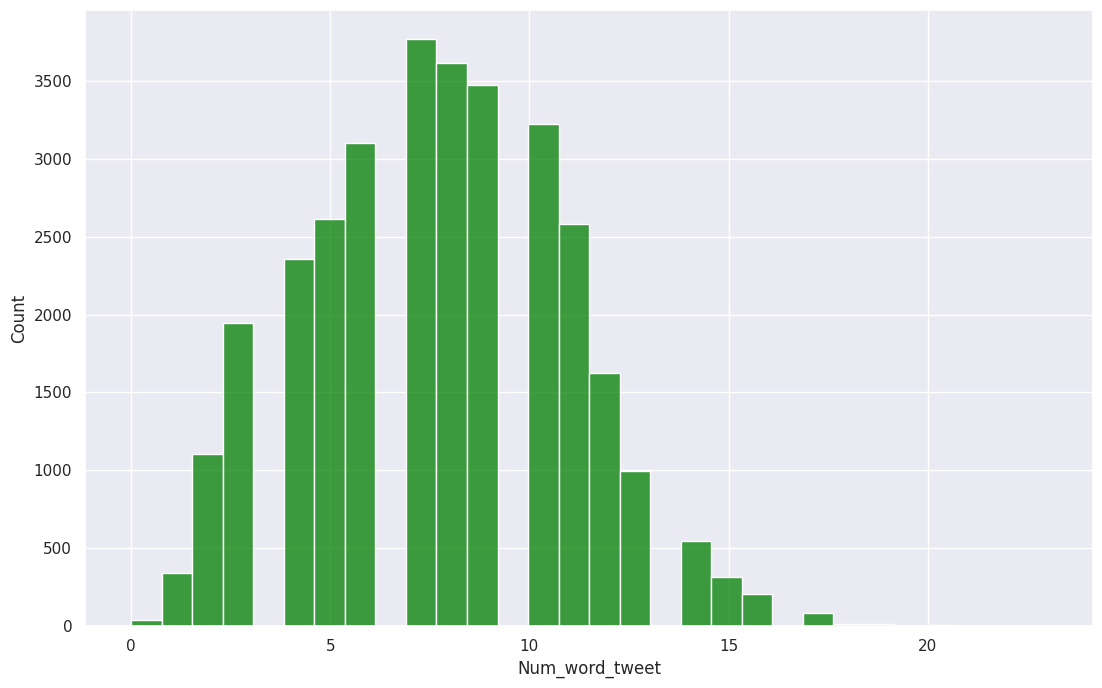

In [ ]:
sns.histplot(data=df_vis, x="Num_word_tweet",bins=30,color='green')

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-37-89f283d166b1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='blue')
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-

Text(0.5, 0.98, 'Average word length in each tweet')

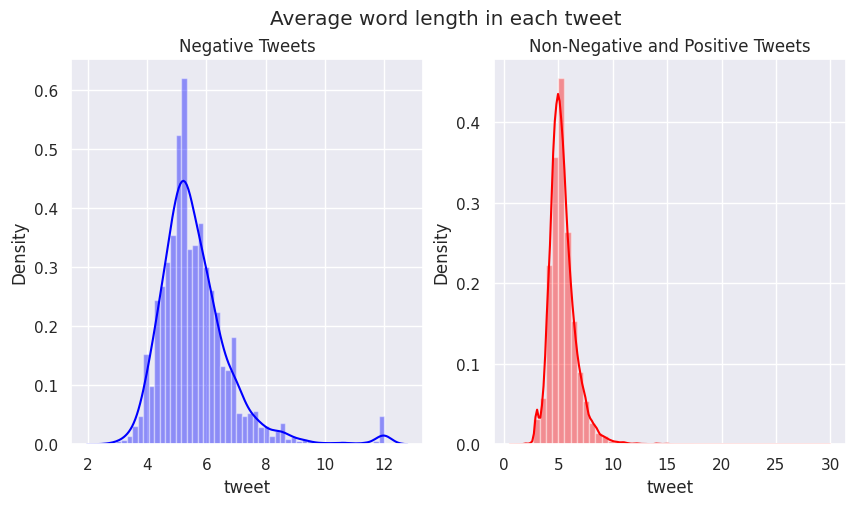

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
word=df_train[df_train['label']==1]['tweet'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='blue')
ax1.set_title('Negative Tweets')
word=df_train[df_train['label']==0]['tweet'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='red')
ax2.set_title('Non-Negative and Positive Tweets')
fig.suptitle('Average word length in each tweet')

In [ ]:
df_vis['temp_list'] = df_vis['tweet'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df_vis['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,love,3229
1,day,2890
2,happi,2104
3,amp,1778
4,thank,1573
5,get,1257
6,time,1251
7,life,1165
8,u,1163
9,go,1156


<Axes: xlabel='count', ylabel='Common_words'>

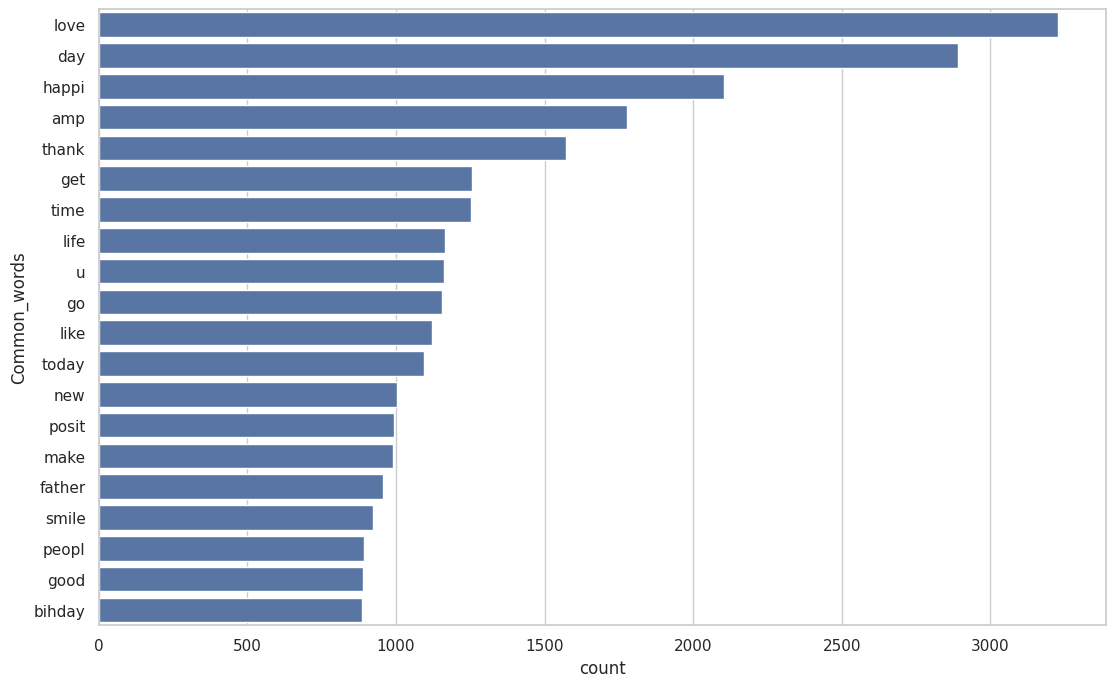

In [ ]:
sns.set_theme(style="whitegrid")
sns.barplot(x="count", y="Common_words", data=temp)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
clf = Pipeline([
    ('vect', CountVectorizer(stop_words= "english",max_features=3000)),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier()),
    ])

In [ ]:
X = df_train['tweet']
y = df_train['label']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 40,
                                                   test_size = 0.20,stratify=y)

In [ ]:
text_classifier = clf.fit(X_train,y_train)

In [ ]:
predictions = text_classifier.predict(X_test)

In [ ]:
np.unique(predictions)

array([0, 1])

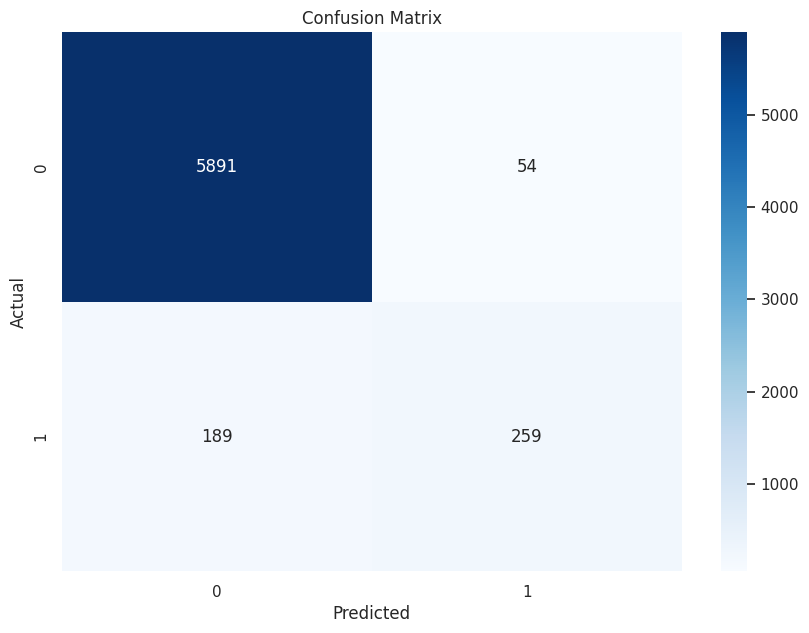

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming y_test and predictions are defined
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, f1_score
def Confusion_Matrix(y_test,ypred):
    cfmat = confusion_matrix(y_test,ypred)
    print('Confusion Matrix: \n',classification_report(y_test,ypred,labels=[0,1]))
    print("\n")
    print('TN - True Negative {}'.format(cfmat[1,1]))
    print('FP - False Positive {}'.format(cfmat[1,0]))
    print('FN - False Negative {}'.format(cfmat[0,1]))
    print('TP - True Positive {}'.format(cfmat[0,0]))
    print('Accuracy Rate: {}'.format(np.divide(np.sum([cfmat[0,0],cfmat[1,1]]),np.sum(cfmat))))
    print('Misclassification Rate: {}'.format(np.divide(np.sum([cfmat[0,1],cfmat[1,0]]),np.sum(cfmat))))
    print('F1-Score: {}'.format(f1_score(y_test, ypred,average='macro')))
    print('ROC-AUC {}'.format(roc_auc_score(y_test,ypred)))

In [ ]:
# Import the necessary function
from sklearn.metrics import roc_auc_score

# Now you can use the `roc_auc_score` function
Confusion_Matrix(y_test, predictions)

Confusion Matrix: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      5945
           1       0.83      0.58      0.68       448

    accuracy                           0.96      6393
   macro avg       0.90      0.78      0.83      6393
weighted avg       0.96      0.96      0.96      6393



TN - True Negative 259
FP - False Positive 189
FN - False Negative 54
TP - True Positive 5891
Accuracy Rate: 0.9619896762083529
Misclassification Rate: 0.038010323791647115
F1-Score: 0.8302377056122129
ROC-AUC 0.7845208683767873


In [ ]:
!pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as PL
from numpy import where,mean
from collections import Counter
from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score

In [ ]:
vect = CountVectorizer(stop_words= "english",max_features=3000)
tfidf = TfidfTransformer()
over = SMOTE(sampling_strategy=0.2)
under = RandomUnderSampler(sampling_strategy=0.5)
model = RandomForestClassifier()

In [ ]:
X = df_train['tweet']
y = df_train['label']

In [ ]:
counter = Counter(y)
print("Tweet Sentiment Class Proportion before oversampling and undersampling: \n",counter)

Tweet Sentiment Class Proportion before oversampling and undersampling: 
 Counter({0: 29720, 1: 2242})


In [ ]:
trf = vect.fit(X)
X = trf.transform(X)

In [ ]:
steps = [('over', over), ('under', under)]
pipeline = PL(steps=steps)

In [ ]:
X_new, y_new = pipeline.fit_resample(X, y)

In [ ]:
counter_new = Counter(y_new)
print("Tweet Sentiment Class Proportion after oversampling and undersampling: \n",counter_new)

Tweet Sentiment Class Proportion after oversampling and undersampling: 
 Counter({0: 11888, 1: 5944})


In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_new, y_new,random_state = 40,
                                                   test_size = 0.20,stratify=y_new)

In [ ]:
# For evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 40,
                                                   test_size = 0.20,stratify=y)

In [ ]:
Counter(y)

Counter({0: 29720, 1: 2242})

In [ ]:
pipeline2 = Pipeline([
    ('tfidf', tfidf),
    ('model', model),
    ])

In [ ]:
text_classifier2 = pipeline2.fit(X_train2,y_train2)

In [ ]:
predictions2 = text_classifier2.predict(X_test)

In [ ]:
Confusion_Matrix(y_test,predictions2)

Confusion Matrix: 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97      5945
           1       0.54      0.95      0.69       448

    accuracy                           0.94      6393
   macro avg       0.77      0.94      0.83      6393
weighted avg       0.96      0.94      0.95      6393



TN - True Negative 425
FP - False Positive 23
FN - False Negative 361
TP - True Positive 5584
Accuracy Rate: 0.9399343031440638
Misclassification Rate: 0.06006569685593618
F1-Score: 0.8277879292618648
ROC-AUC 0.9439687086987866
